In [1]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/thearda-General-Social-Survey-2010/SPSS/")
os.listdir(os.getcwd())
df = pd.read_csv("output_file.csv",  encoding = 'unicode_escape', engine ='python')
df_names = pd.read_csv("output_file_w_col_names.csv",  encoding = 'unicode_escape', engine ='python')
df_names

YEAR: GSS year for this respondent  ID: Respondent's ID number  \
0                                 2010.0                         1.0   
1                                 2010.0                         2.0   
2                                 2010.0                         3.0   
3                                 2010.0                         4.0   
4                                 2010.0                         5.0   
...                                  ...                         ...   
4896                              2010.0                      9577.0   
4897                              2010.0                      9578.0   
4898                              2010.0                      9579.0   
4899                              2010.0                      9580.0   
4900                              2010.0                      9581.0   

     WRKSTAT: Last week were you working full-time, part-time, going to school, keeping house, or what?  \
0                                     Working full-time                                                   
1                                     Working full-time                                                   
2                                               Retired                                                   
3                                               Retired                                                   
4                                               Retired                                                   
...                                                 ...                                                   
4896                                  Working full-time                                                   
4897                                            Retired                                                   
4898  With a job, but not at work because of tempora...                                                   
4899                                  Working full-time                                                   
4900                                            Retired                                                   

     HRS1: If working, full- or part-time, how many hours did you work last week, at all jobs?  \
0                                                    55                                          
1                                                    45                                          
2                                          Inapplicable                                          
3                                          Inapplicable                                          
4                                          Inapplicable                                          
...                                                 ...                                          
4896                                                 40                                          
4897                                       Inapplicable                                          
4898                                                  9                                          
4899                                                 40                                          
4900                                       Inapplicable                                          

     HRS2: If with a job, but not at work: How many hours a week do you usually work, at all jobs?  \
0                                          Inapplicable                                              
1                                          Inapplicable                                              
2                                          Inapplicable                                              
3                                          Inapplicable                                              
4                                          Inapplicable                                              
...                                                 ...            

## General notes

"Since 1972, the General Social Survey (GSS) has monitored societal change and studied the growing complexity of American society."
- Started in Iniversity of Chicago
- The GSS gathers data on contemporary American society
- Funded by National Science Foundation
- Possbile Respondants: All noninstitutionalized, English and Spanish speaking persons 18 years of age or older, living in the United States

Methods of data collection: 

-  the U.S. version of these questions is incorporated into the cross-sectional GSS studies.
- Before 2020, surveys were conducted face to face (like this one)
- "basic scientific research on the structure and development of American society with a data-collection program designed to both monitor societal change within the United States and to compare the United States to other nations"


### My own notes

Since these interviews are largely done in person, it matters who can attend the interview, and where GSS sources people from 
(This site)[https://ssric.org/trd/other/ssda/gssdesc] states that the "GSS tries to follow the highest survey standards"

[Wikipedia](https://en.wikipedia.org/wiki/General_Social_Survey) states "The GSS sample is drawn using an area probability design that randomly selects respondents in households across the United States to take part in the survey. Respondents that become part of the GSS sample are from a mix of urban, suburban, and rural geographic areas. Participation in the study is strictly voluntary"

The inportant part here is that its completely volentary. Those which are may be busy, or unwilling to participate which might have a different spread won't be represented

In [2]:
for col in df_names.columns:
    if col.__contains__("nuclear"):
        print(col)

POLNUKE: Elected officials (How well elected officials know risk by nuclear power?)
BIZNUKE: Business leaders (How well business leaders know risk by nuclear power?)
ENGNUKE: Nuclear engineers (How well nuclear engineers know risk by nuclear power?)
ENGAGRNK: Please look at Card E14. (On a scale of 1 to 5, where 1 means 'Near complete agreement' and 5 means 'No agreement at all') to what extent do nuclear engineers agree on the risks and benefits of nuclear power to generate electricity?
ENHINFNK: Some say that the government should expand the use of nuclear power to generate electricity in the U.S. Others oppose any expansion in the use of nuclear power in this country. Please look at Card E15. How much influence should each of the following groups
POLINFNK: (Please look at Card E15. How much influence should each of the following groups have in deciding whether to expand the use of nuclear power? Elected officials. (Would you say . . .)
BIZINFNK: (Please look at Card E15. How much in

In [3]:
for col in df_names.columns:
    if col.__contains__("climate"):
        print(col)

TEMPGEN1: In general, do you think that a rise in the world's temperature caused by climate change is extremely dangerous for the environment, very dangerous, somewhat dangerous, not very dangerous, or not dangerous at all for the environment?


In [4]:
nuke_str = "NUKEELEC"
for col in df.columns:
    #print(df['NUKEELEC'])
    pass

In [5]:
# drop all Inapplicable
df_clean_nuke = df.copy()
df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
df_clean_nuke_1 = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']

def mean_df_gen(col_name, df=df_clean_nuke):
    #Mean of groups
    temp_df = df[[col_name, "NUKEELEC"]].copy()
    temp_df['NUKEELEC'] = temp_df['NUKEELEC'].map({"Strongly oppose": 1, "Somewhat oppose": 2, "No answer": 3, "Somewhat favor": 4, "Strongly favor": 5})
    mean_df = temp_df.groupby([col_name])['NUKEELEC'].mean().reset_index().copy()
    return mean_df

In [6]:
import pyreadstat
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/thearda-General-Social-Survey-2010/SPSS/")
df_sav, meta = pyreadstat.read_sav("General Social Survey 2010 Cross-Section and Panel Combined.SAV", user_missing=True, apply_value_formats=True)
df_sav['TEMPGEN1']

0                                    Don't know
1       Extremely dangerous for the environment
2                                    Don't know
3                                Very dangerous
4                                  Inapplicable
                         ...                   
4896                                        NaN
4897                                        NaN
4898                                        NaN
4899                                        NaN
4900                                        NaN
Name: TEMPGEN1, Length: 4901, dtype: category
Categories (8, object): ['Don't know', 'Extremely dangerous for the environment', 'Inapplicable', 'No answer', 'Not dangerous at all for the environment', 'Not very dangerous', 'Somewhat dangerous', 'Very dangerous']

In [7]:
df_sav['PRESTG80']

0                        65
1                        64
2                        32
3       Don't know, NA, IAP
4                        36
               ...         
4896                     74
4897                     22
4898                     44
4899                     34
4900                     74
Name: PRESTG80, Length: 4901, dtype: category
Categories (59, object): ['17', '19', '20', '21', ..., '74', '75', '86', 'Don't know, NA, IAP']

In [8]:
print(meta.missing_user_values)

{}


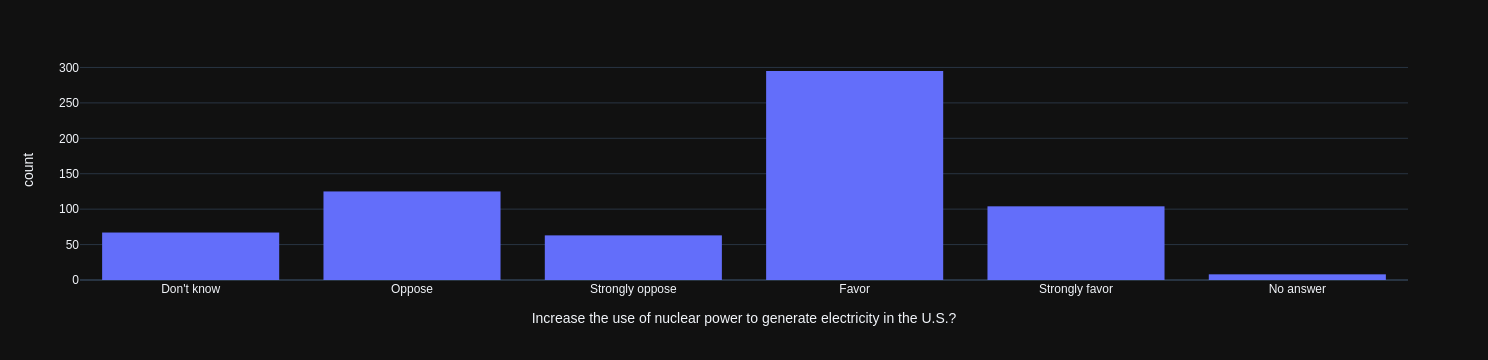

In [9]:
import plotly.express as px
my_dict = {'Inapplicable':0,
           'Strongly favor':0,
           'Favor':0,
           'Oppose':0,
           'Strongly oppose':0,
           "Don't know":0,
           'No answer':0
          }
'''
0) Inapplicable	3930	80.2
1) Strongly favor	141	2.9
2) Favor	441	9.0
3) Oppose	196	4.0
4) Strongly oppose	87	1.8
8) Don't know	96	2.0
9) No answer	10	0.2
'''
for i in df_sav['NUKEELEC']:
    
    if i == 0:
        my_dict['Inapplicable'] += 1
    elif i == 1:
        my_dict['Strongly favor'] += 1
    elif i == 2:
        my_dict['Favor'] += 1
    elif i == 3:
        my_dict['Oppose'] += 1
    elif i == 4:
        my_dict['Strongly oppose'] += 1
    elif i == 5:
        my_dict["Don't know"] += 1
    elif i == 6:
        my_dict["No answer"] += 1   
    pass

#Not sure why so many are Inapplicable
my_dict.pop('Inapplicable')
my_dict.pop('No answer')
my_dict.pop("Don't know")


'''
fig = px.bar(x = my_dict.values(), y = my_dict.keys(), title="Attitudes towards Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()
fig = px.pie(values = my_dict.values(), names = my_dict.keys(), title="Attitudes towards Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()
'''
fig = px.histogram(df_clean_nuke_1, x="NUKEELEC", barmode="group", template='plotly_dark').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?"
)
fig.show()

Like the Bisconti data, the GSS data shows that most people are in support. However, only hesitantly are these people on the favor side. 

This could be after many years of high expectations of nuclear energy, the people still feel nuclear energy still has the same problems that it did many years ago

["('Oppose', 'Very dangerous')",
 "('Strongly oppose', 'Extremely dangerous for the environment')",
 "('Favor', 'Very dangerous')",
 "('Favor', 'Somewhat dangerous')",
 "('Oppose', 'Somewhat dangerous')",
 "('Strongly favor', 'Not dangerous at all for the environment')",
 "('Favor', 'Extremely dangerous for the environment')",
 "('Oppose', 'Extremely dangerous for the environment')",
 "('Strongly oppose', 'Very dangerous')",
 "('Strongly favor', 'Extremely dangerous for the environment')",
 "('Strongly favor', 'Somewhat dangerous')",
 "('Favor', 'Not very dangerous')",
 "('Favor', 'Not dangerous at all for the environment')",
 "('Strongly favor', 'Very dangerous')",
 "('Strongly favor', 'Not very dangerous')",
 "('Strongly oppose', 'Somewhat dangerous')",
 "('Oppose', 'Not very dangerous')",
 "('Strongly oppose', 'Not very dangerous')"]


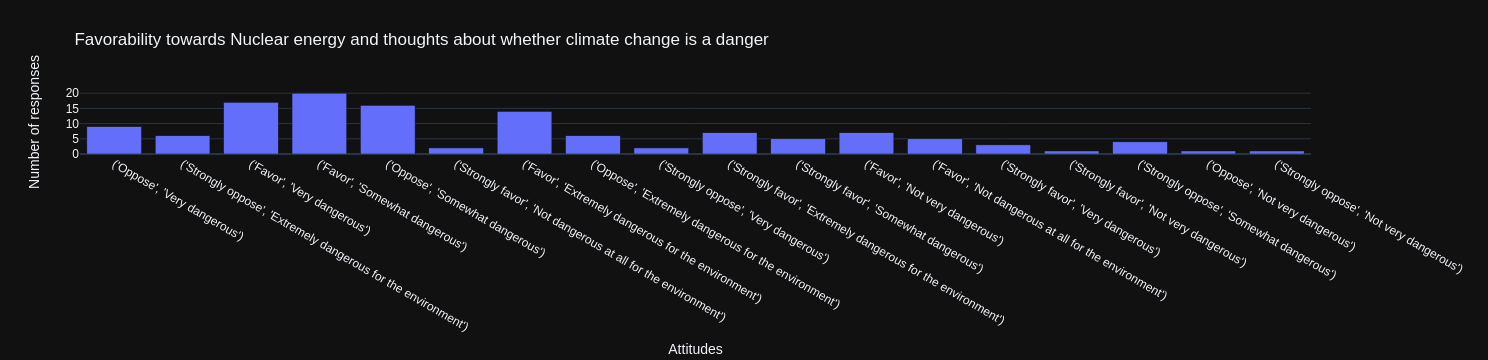

In [10]:
import math
import plotly.express as px
import pprint
import plotly.figure_factory as ff
import chart_studio.plotly as py
'''
TEMPGEN1
0) Inapplicable	614	30.0
1) Extremely dangerous for the environment	286	14.0
2) Very dangerous	364	17.8
3) Somewhat dangerous	416	20.4
4) Not very dangerous	181	8.9
5) Not dangerous at all for the environment	78	3.8
8) Don't know	100	4.9
9) No answer	5	0.2
'''
climate_nuclear_dict = {}


for ind in df.index:
    #print(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])
    if (df['NUKEELEC'][ind], df['TEMPGEN1'][ind]) not in climate_nuclear_dict:
        climate_nuclear_dict[(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])] = 1
    else:
        climate_nuclear_dict[(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])] += 1
    #if "favor" in df_sav['NUKEELEC'][ind]:
        #print(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])
        #pass
    pass


climate_nuclear_dict_short = {}


# These values are unless. Inapplicable also makes up a LARGE amount of responses.
for key, value in climate_nuclear_dict.items():
    if "Inapplicable" not in key and "Don't know" not in key and "No answer" not in key:
        if not pd.isna(key[1]):
            climate_nuclear_dict_short[key] = value
        pass

'''
NOTE: MANY values in TEMPGEN1 (climate change thoughts were MISSING from the study. 
Not sure why, but I've checked it the multiple file formats they gave me

'''
climate_nuclear_dict_copy = climate_nuclear_dict_short.copy()

freq_list = list(climate_nuclear_dict_short.values())
combos_list = list(climate_nuclear_dict_short.keys())

#pprint.pprint(freq_list)

for index, a in enumerate(combos_list):
    combos_list[index] = str(a)

pprint.pprint(combos_list)    

fig = px.bar(x = combos_list, y = freq_list, title="Favorability towards Nuclear energy and thoughts about whether climate change is a danger", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()

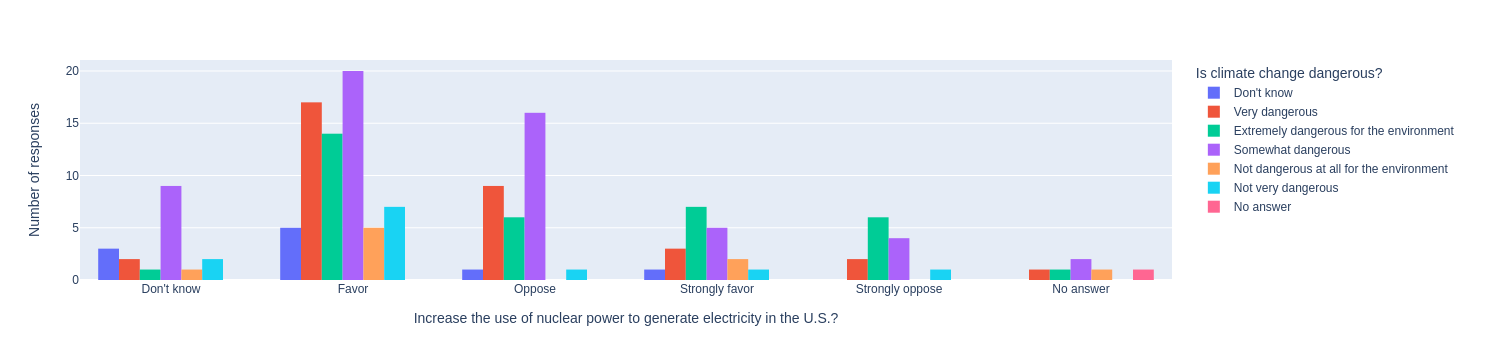

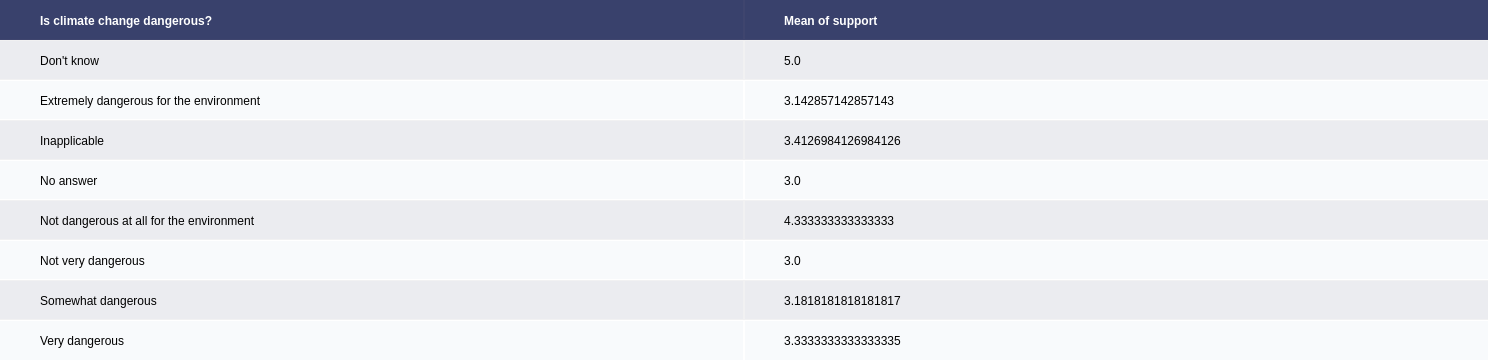

In [11]:
# This might be a better way to display the above data

# drop all Inapplicable
#df_clean_nuke = df.copy()
#df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
#df_clean_nuke = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']

fig = px.histogram(df_clean_nuke_1, x="NUKEELEC", color="TEMPGEN1", barmode="group").update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Is climate change dangerous?"
)
fig.show()

mean_df = mean_df_gen("TEMPGEN1")

mean_df.columns =["Is climate change dangerous?", "Mean of support"]
fig = ff.create_table(mean_df)
fig.show()

# Climate change

- Majority of responses show that respondants only favor nuclear energy
- Those woh doesn't think nuclear energy are in support of it, which would make logical sense
- However those who do think it's extremely dangerous, are still only neutral on the topic. They generally are not against nuclear energy
- The don't know category is so high likely because of the low amount of "dont know" responses

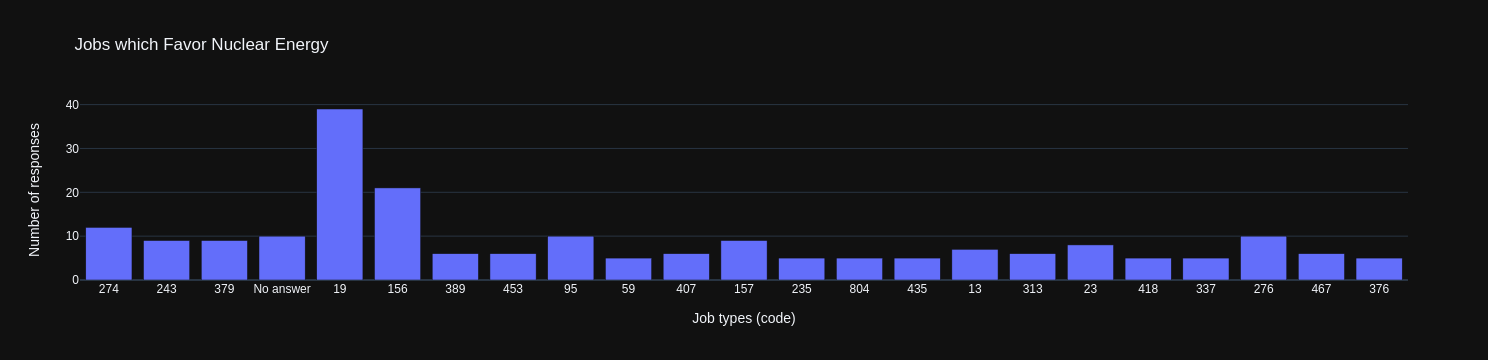

In [12]:
import collections

# Respondent's occupation
# occupation code in PDF
col_code = "OCC80"
strongly_favor_occup = {}
for i in df.index:
    if df['NUKEELEC'][i] == "Strongly favor":
        #print(df['NUKEELEC'][i])
        if df[col_code][i] not in strongly_favor_occup:
            strongly_favor_occup[df[col_code][i]] = 1
        else:
            strongly_favor_occup[df[col_code][i]] += 1

favor_occup = {}
for i in df.index:
    if df['NUKEELEC'][i] == "Favor":
        if df[col_code][i] not in favor_occup:
            favor_occup[df[col_code][i]] = 1
        else:
            favor_occup[df[col_code][i]] += 1
            
favor_occup_short = {}

for key, value in favor_occup.items():
    if value > 4:
        favor_occup_short[key] = value
        
fig = px.bar(x = favor_occup_short.keys(), y = favor_occup_short.values(), title="Jobs which Favor Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Job types (code)", yaxis_title="Number of responses"
)
fig.show()

#len(strongly_favor_occup)
#strongly_favor_occup
#favor_occup
#favor_occup_short

# count frequency of jobs
#count = collections.Counter(df[col_code])
#res = {key: val for key, val in sorted(dict(count).items(), key = lambda ele: ele[1], reverse = True)}
#res

In [13]:
# Spouse's occupational prestige (See Note 2: Occupational Prestige and Socioeconomic Index Scores on ARDA summary page)
col_code = 'SPPRES80'
# Respondent's occupational prestige
col_code = 'PRESTG80'

count = collections.Counter(df[col_code])
res = {key: val for key, val in sorted(dict(count).items(), key = lambda ele: ele[1], reverse = True)}
#res

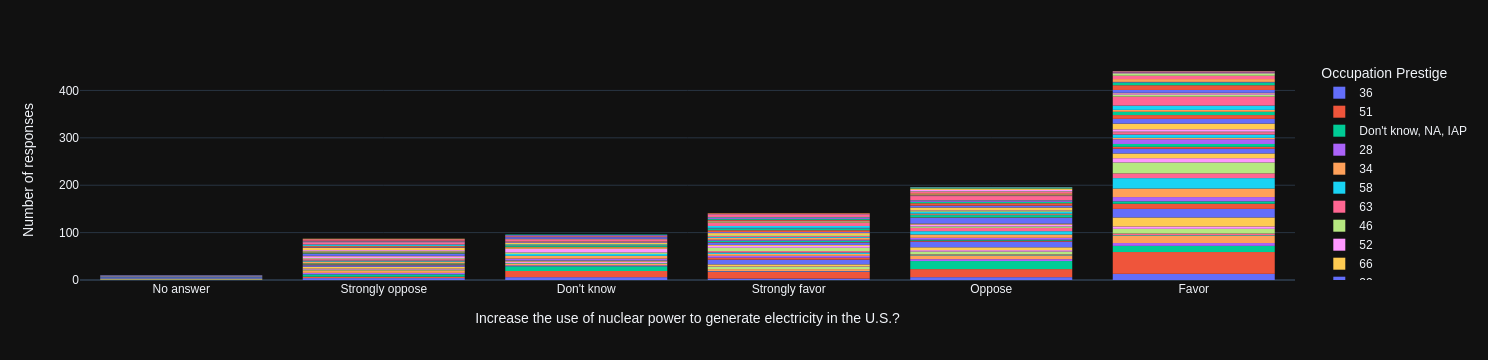

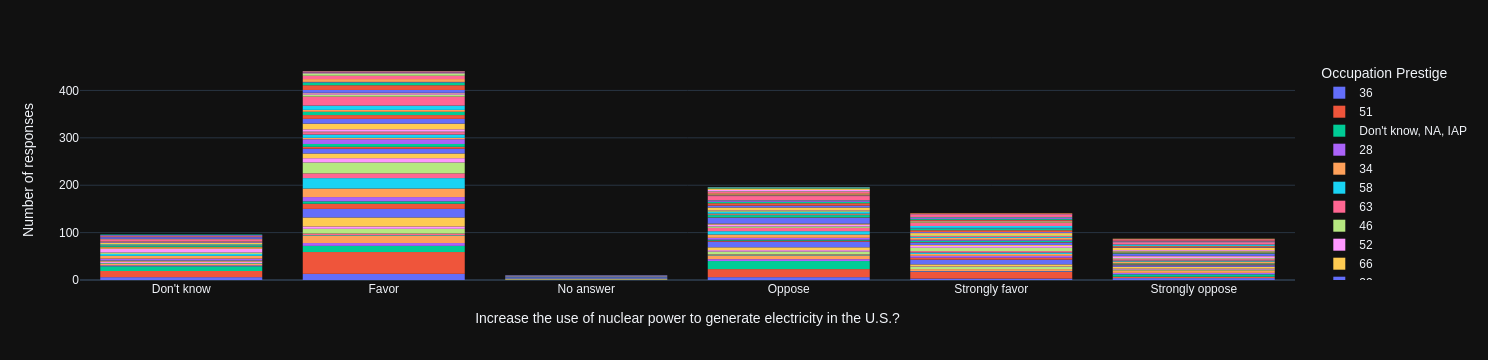

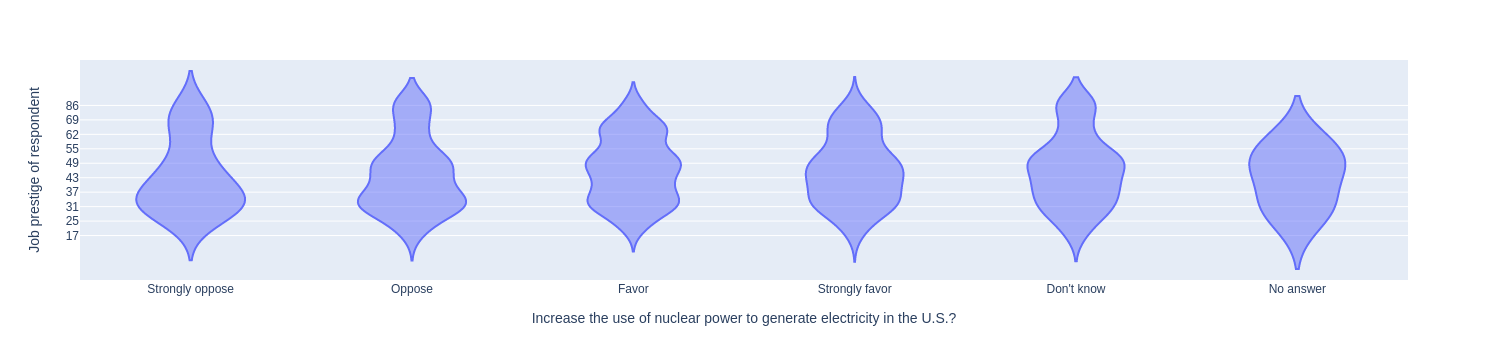

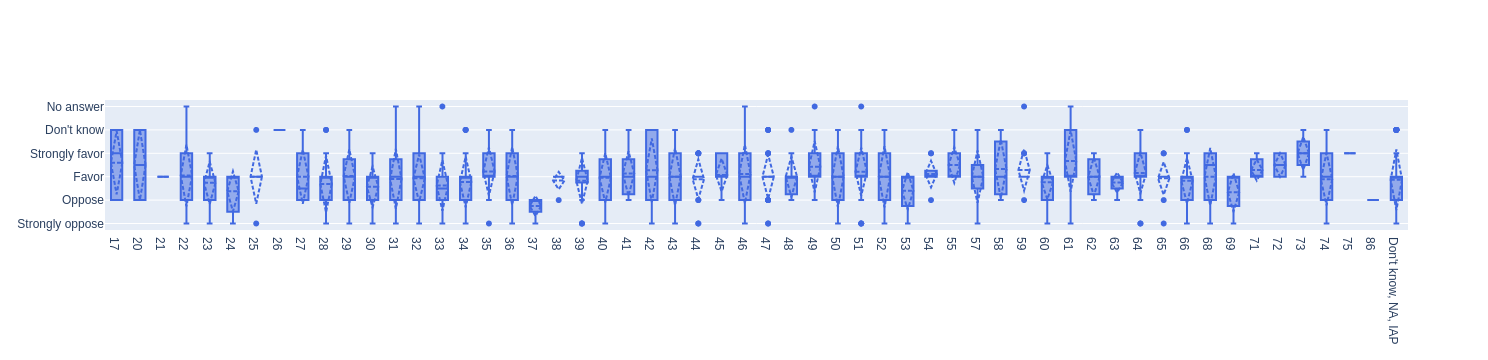

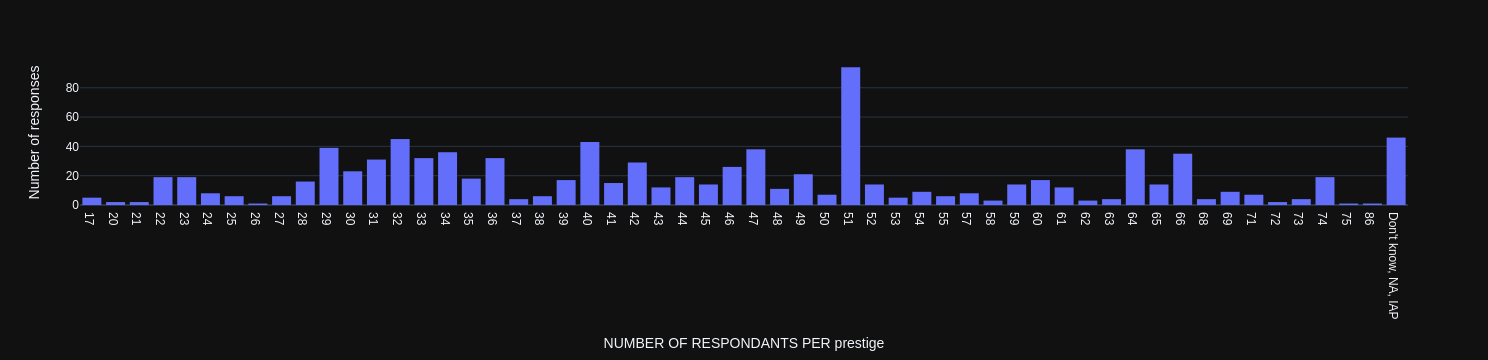

In [14]:
import plotly.express as px
import plotly.graph_objects as go

# Sort the amount of favorability of nuclear energy based on occupation prestige

df_clean_nuke = df.copy()

# drop all Inapplicable
index_names = df_clean_nuke[ df_clean_nuke['NUKEELEC'] == 'Inapplicable' ].index
df_clean_nuke.drop(index_names, inplace = True)

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="PRESTG80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Occupation Prestige"
)
fig.show()
# category ascending
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="PRESTG80", template='plotly_dark').update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Occupation Prestige"
)
fig.show()

fig = px.violin(df_clean_nuke, x="NUKEELEC", y="PRESTG80").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
                                                                       ).update_yaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Job prestige of respondent",
)
fig.show()

mean_df = mean_df_gen("PRESTG80")

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["PRESTG80"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(
    categoryorder='category ascending')
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

#numbers of respondants per prestige
df_clean_nuke["PRESTG80"].value_counts()
fig = px.histogram(df_clean_nuke, x="PRESTG80", template='plotly_dark').update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="NUMBER OF RESPONDANTS PER prestige", yaxis_title="Number of responses")
fig.show()

### Occupation prestige



- Those with lower prestige are the ones which mostly oppose nuclear energy. This might because the education level to have these types of jobs is lower, so perhaps they are not as informed.
- Largest group by part is workers with prestige of 51. These include, but are not limited to: computer programmers, health practitioners, Radio and television announcers
    * These types of positions lean towards favoring. Perhaps because they are more informed, or have more enthusism for the science behind it. Another possibility is that moetariy, swithching to nuclear won't benifit their jobs, or perhaps will benefit.
    * Perhaps because many of these types of jobs require good communication skills that they are more willing to take the survey and give their opinion
- Lots of lower prestige jobs from 29-36 are also present. These are the types which strongly oppose or oppose. Perhaps it's because there's a mistrust in politicans? 
    * NOTE TO SELF: Check if GSS value for trust in politicans
- Around the 64 - 66 range, there is a slightly growth of favortism

# Fix everything below here

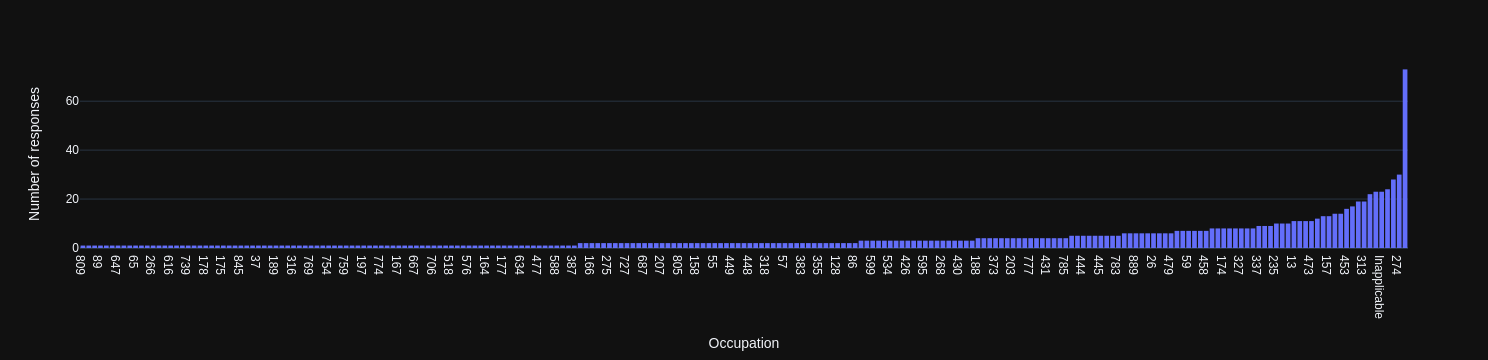

In [15]:
# R's occupation
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="OCC80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation", yaxis_title="Number of responses", legend_title = "occupation"
)
#fig.show()

fig = px.histogram(df_clean_nuke, x="OCC80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation", yaxis_title="Number of responses", legend_title = "occupation"
)
fig.show()


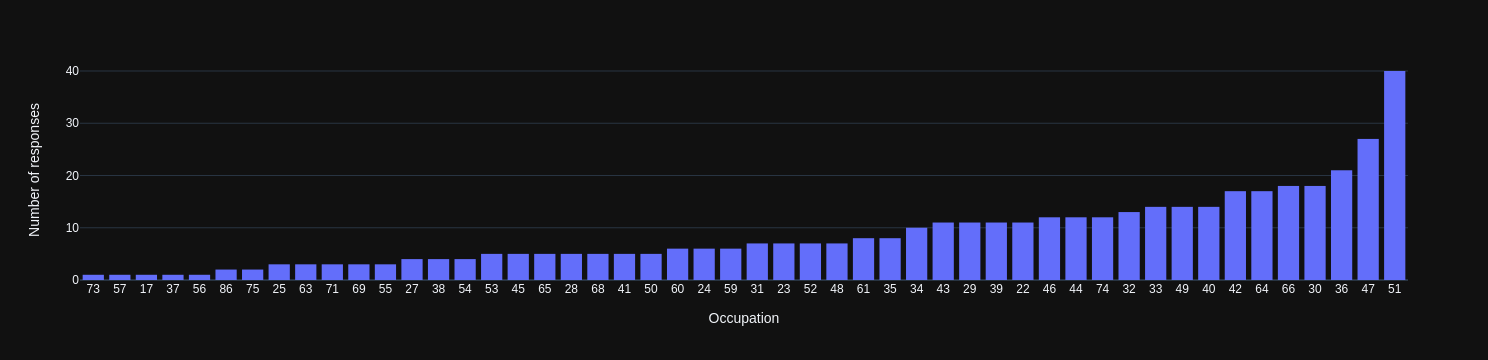

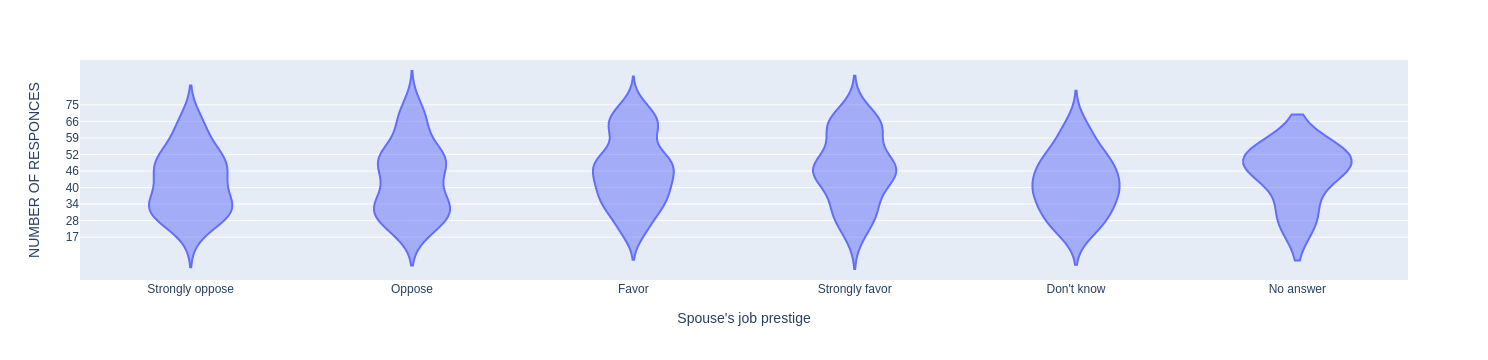

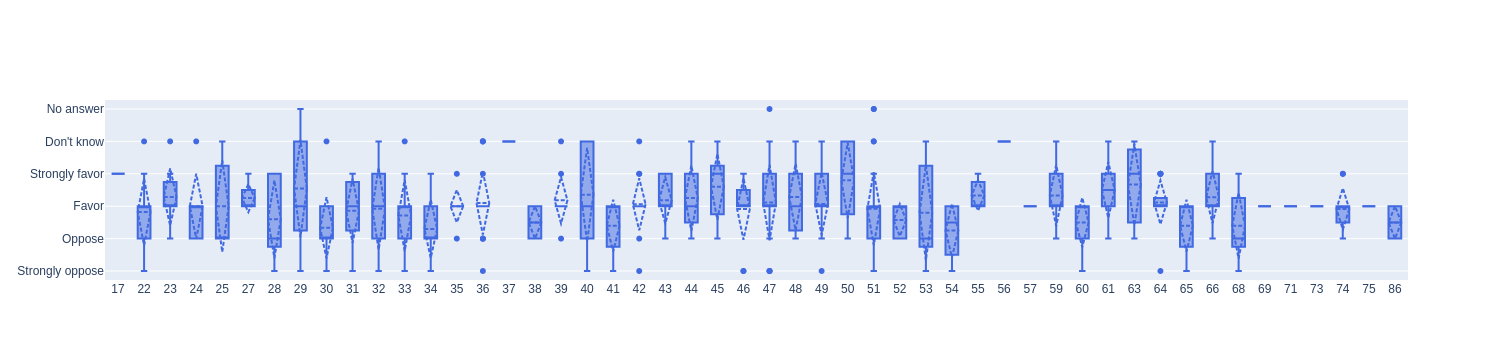

In [16]:
# Spouse's job prestige

df_clean_nuke_spouse = df_clean_nuke[df_clean_nuke.SPPRES80.str.contains('\\d', na=False, regex=True)].copy()

# number of respondants per occupation prestige
fig = px.histogram(df_clean_nuke_spouse, x="SPPRES80", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation", yaxis_title="Number of responses", legend_title = "occupation"
)
fig.show()

# print all values in SPPRES80 which are a digit (prestige num)
#print(df_clean_nuke[df_clean_nuke.SPPRES80.str.contains('\\d', na=False, regex=True)]["SPPRES80"])

# Don't know, NA, IAP

fig = px.histogram(df_clean_nuke_spouse, x="NUKEELEC", color="SPPRES80", template='plotly_dark')
#fig.show()

fig = px.violin(df_clean_nuke_spouse, x="NUKEELEC", y="SPPRES80").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
                                                                       ).update_yaxes(categoryorder='category ascending').update_layout(
xaxis_title="Spouse's job prestige", yaxis_title="NUMBER OF RESPONCES", legend_title="Job prestige OF RESPONDENT",
)
fig.show()

mean_df = mean_df_gen("SPPRES80")

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke_spouse["NUKEELEC"],
    x=df_clean_nuke_spouse["SPPRES80"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_xaxes(
    categoryorder='category ascending')
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

# Spouse's job prestige

Like before, jobs of prestige num 51 are mostly represented 

Like prestige,we see that spouse prestige levels below 50 generally oppose nuclear energy

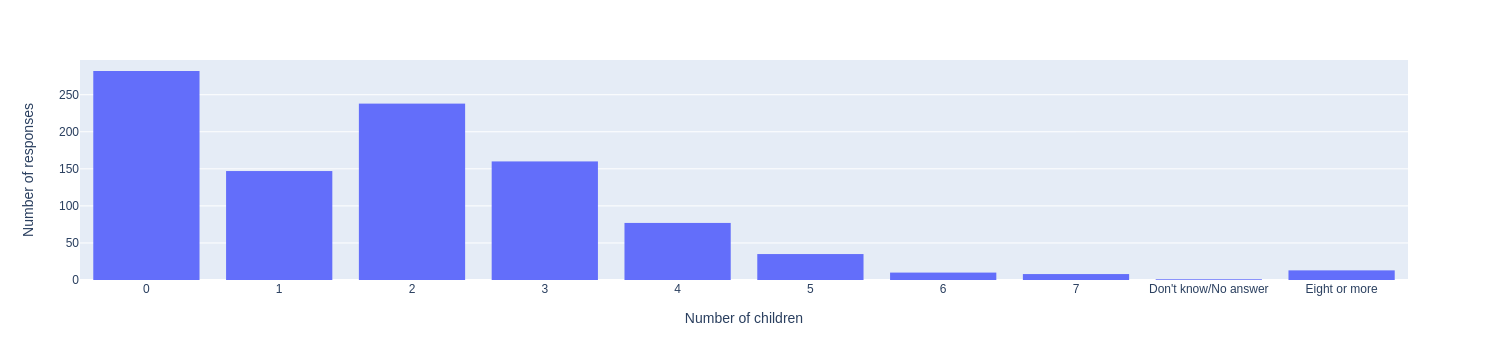

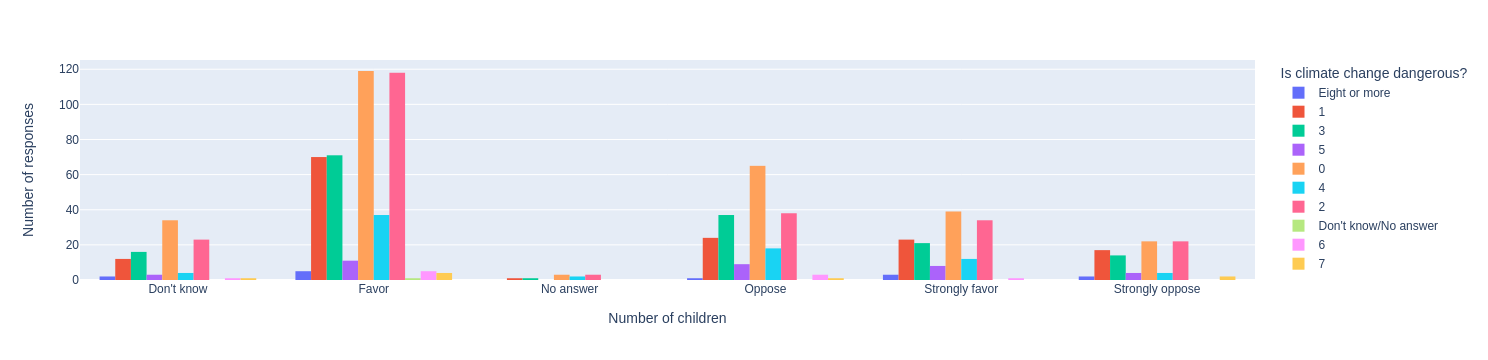

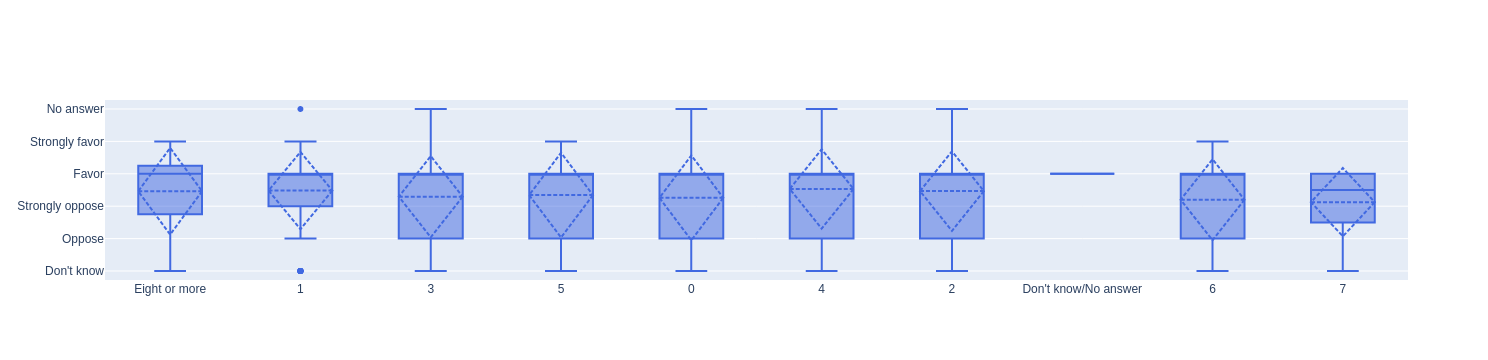

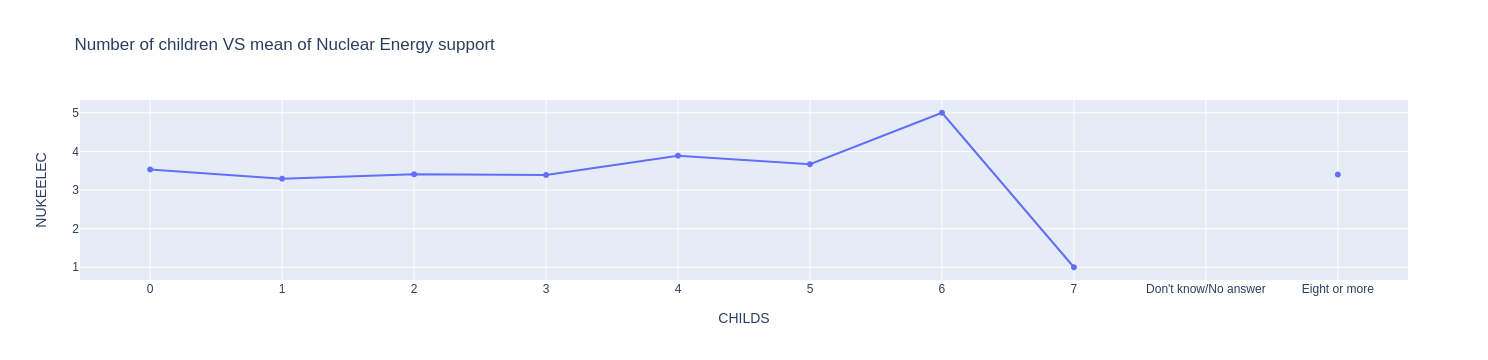

In [17]:
# drop all Inapplicable

fig = px.histogram(df_clean_nuke, x="CHILDS", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses", legend_title = "Is climate change dangerous?"
)
fig.show()


# CHILDS

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="CHILDS", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses", legend_title = "Is climate change dangerous?"
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["CHILDS"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))#.update_yaxes(categoryorder='array', categoryarray=fav_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

mean_df = mean_df_gen("CHILDS")

fig = px.line(mean_df, x="CHILDS", y="NUKEELEC", title="Number of children VS mean of Nuclear Energy support", markers=True)
fig.show()

It seems the more children you have, the more you support nuclear.

But generally people have 4 or less kids

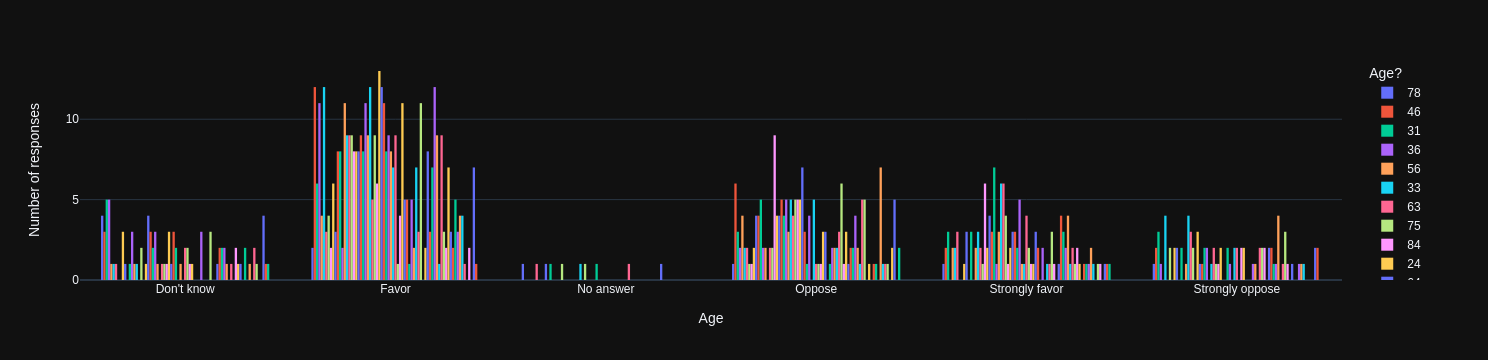

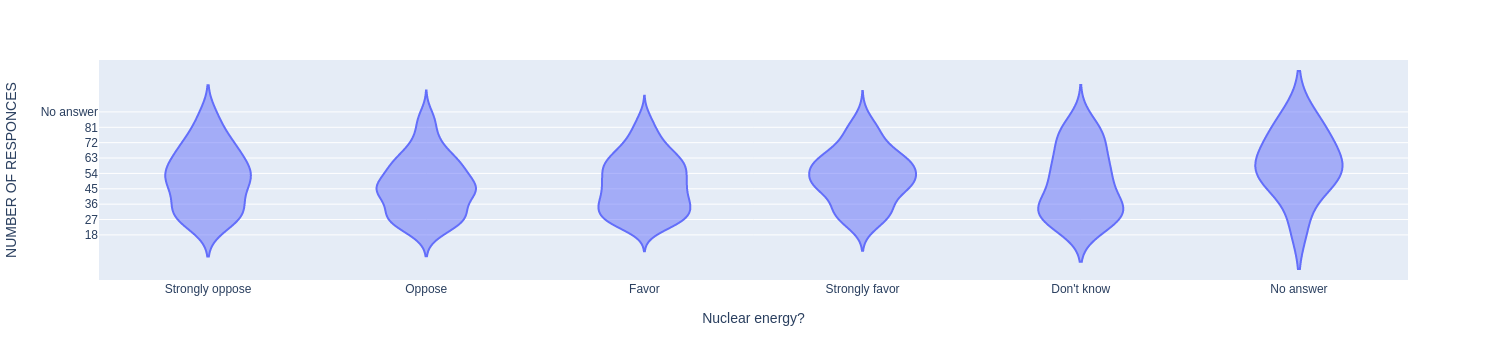

No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
No answer can't be cast to int:  invalid literal for int() with base 10: 'No answer'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'
89 or older can't be cast to int:  invalid literal for int() with base 10: '89 or older'


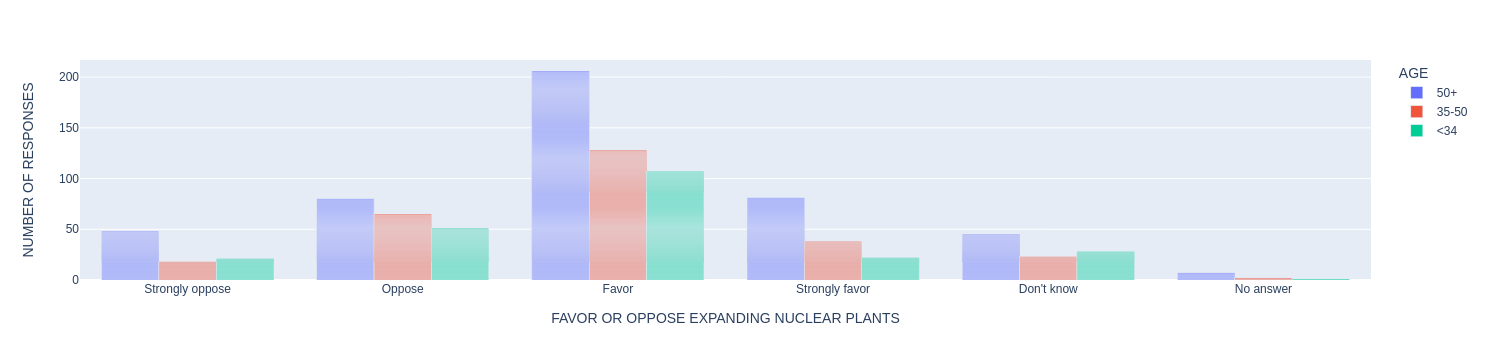

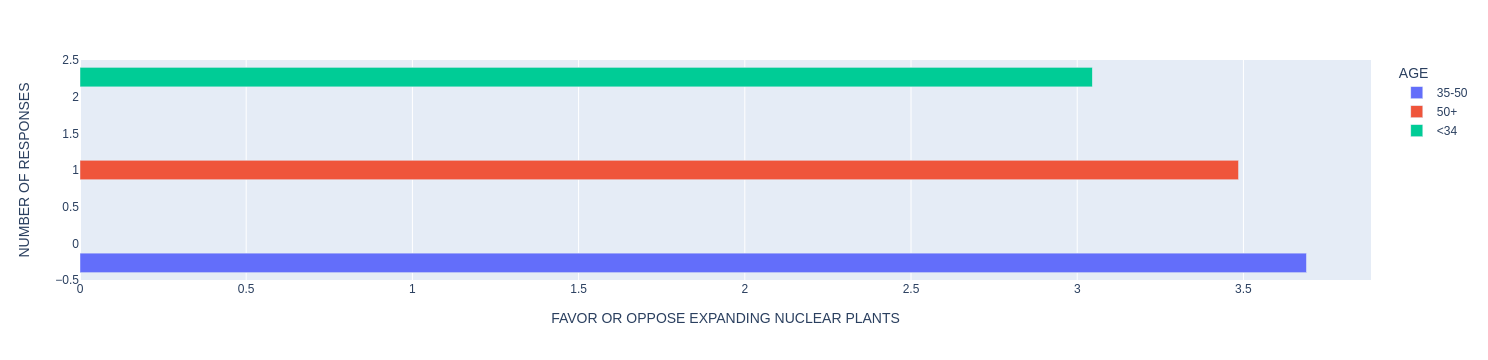

62    25
46    25
29    25
49    25
45    23
      ..
84     3
77     3
80     3
20     2
18     2
Name: AGE, Length: 73, dtype: int64

In [18]:
# Age

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="AGE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Age", yaxis_title="Number of responses", legend_title = "Age?"
)
fig.show()

fig = px.violin(df_clean_nuke, x="NUKEELEC", y="AGE").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]
                                                                       ).update_yaxes(categoryorder='category ascending').update_layout(
xaxis_title="Nuclear energy?", yaxis_title="NUMBER OF RESPONCES",
)
fig.show()

df_age_range = df_clean_nuke[["NUKEELEC", "AGE"]].copy()

def age_range(x):
    try:
        int_x = int(x)
    except ValueError as e:
        print(f"{x} can't be cast to int: ", e)
        return "50+"
    
    if int_x < 34:
        return "<34"
    elif int_x > 34 and int_x < 50:
        return "35-50"
    else:
        return "50+"

df_age_range['AGE'] = df_age_range['AGE'].apply(age_range)

fig = px.bar(df_age_range, x="NUKEELEC", color="AGE", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
fig.show()



mean_df = mean_df_gen("AGE", df_age_range)
fig = px.bar(mean_df, x="NUKEELEC", color="AGE", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Oppose", "Favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
fig.show()

df_clean_nuke["AGE"].value_counts()
#df_age_range.value_counts()

In [19]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['A','B','C'])
print (df)

def add_2(x):
    print(type(x))
    return x+2

df['A'] = df['A'].apply(add_2)
print (df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
<class 'int'>
<class 'int'>
<class 'int'>
   A  B  C
0  3  2  3
1  6  5  6
2  9  8  9


### Age

Before the age of 30, there is not many respondants. In fact there are only 4

Most are around the age of 45 to 62

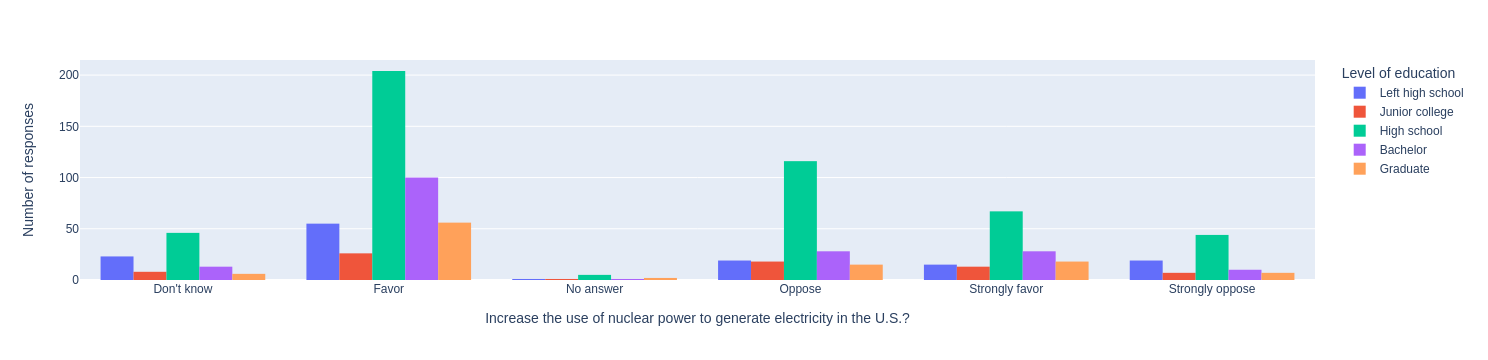

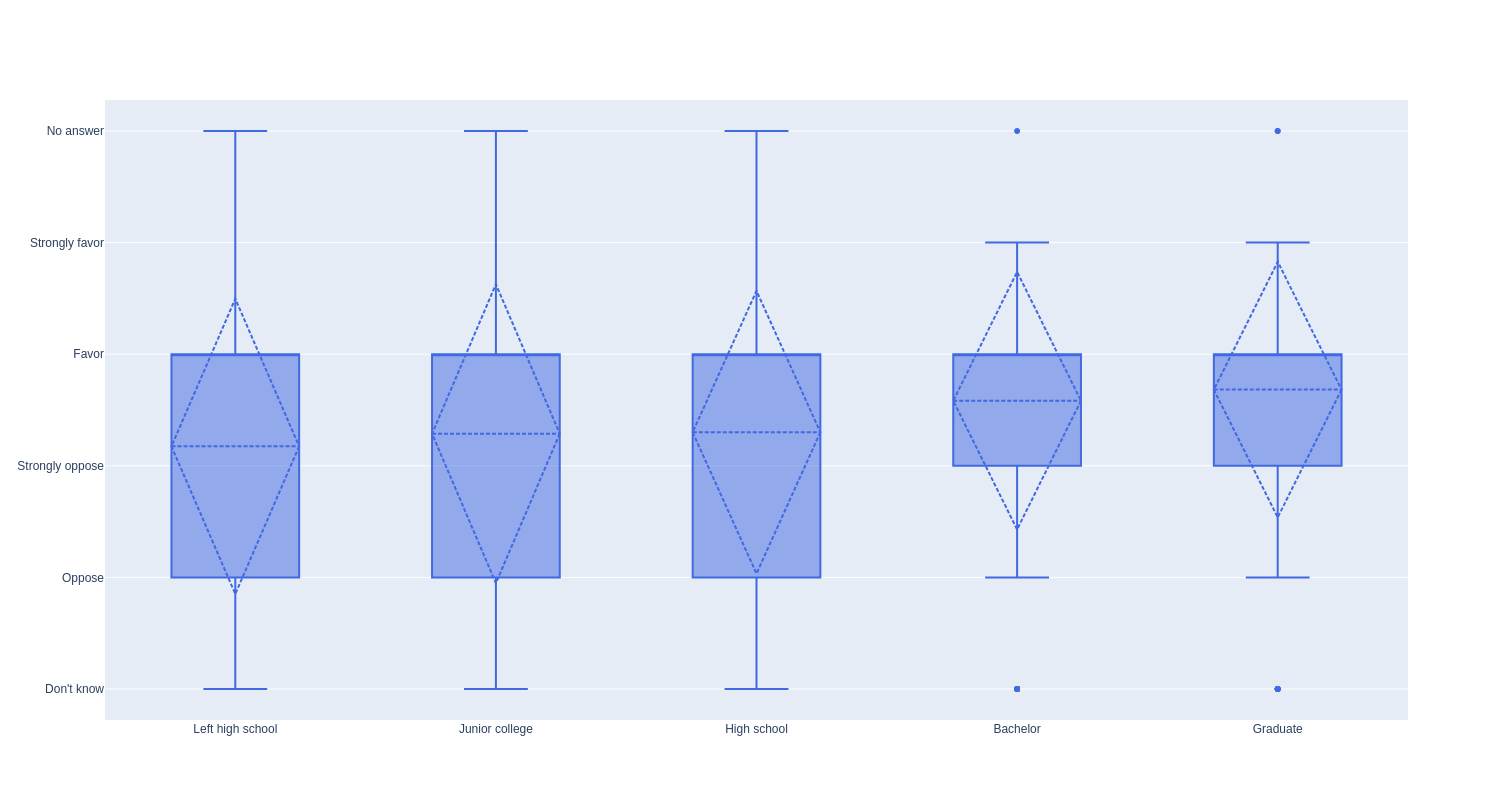

High school         482
Bachelor            180
Left high school    132
Graduate            104
Junior college       73
Name: DEGREE, dtype: int64

In [20]:
# DEGREE

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="DEGREE", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Level of education"
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["DEGREE"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))#.update_yaxes(categoryorder='array', categoryarray=fav_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.update_layout(height=800)
fig.show()

df_clean_nuke["DEGREE"].value_counts()

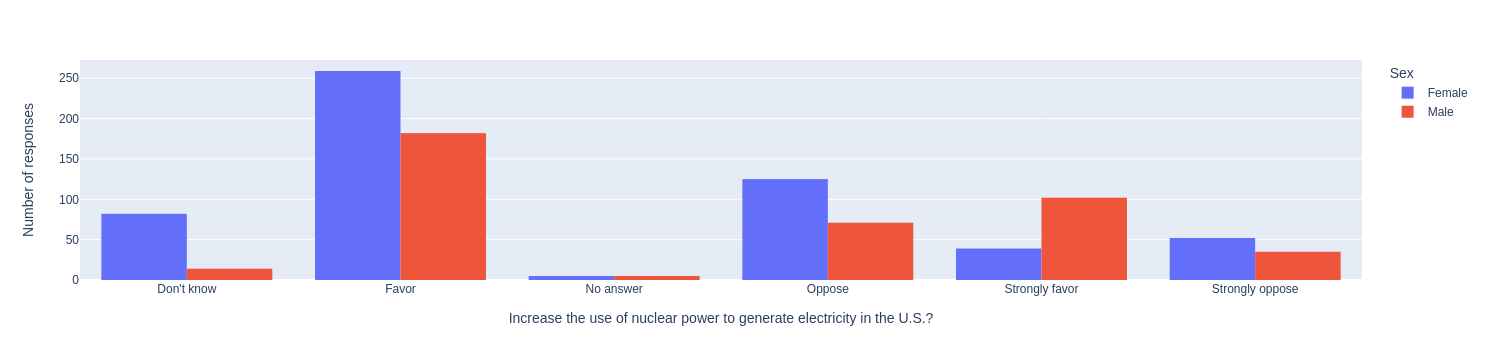

In [21]:
# SEX

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="SEX", barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Sex"
)
fig.show()

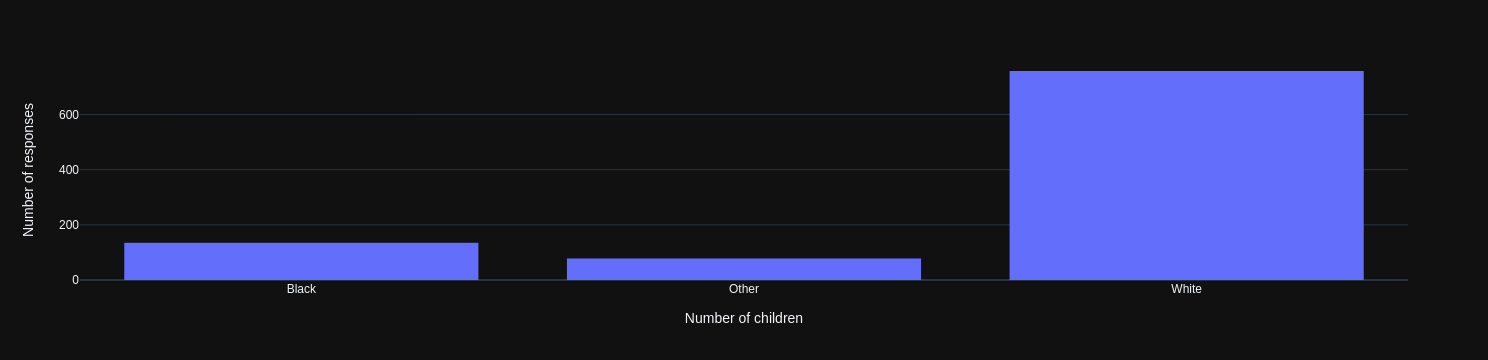

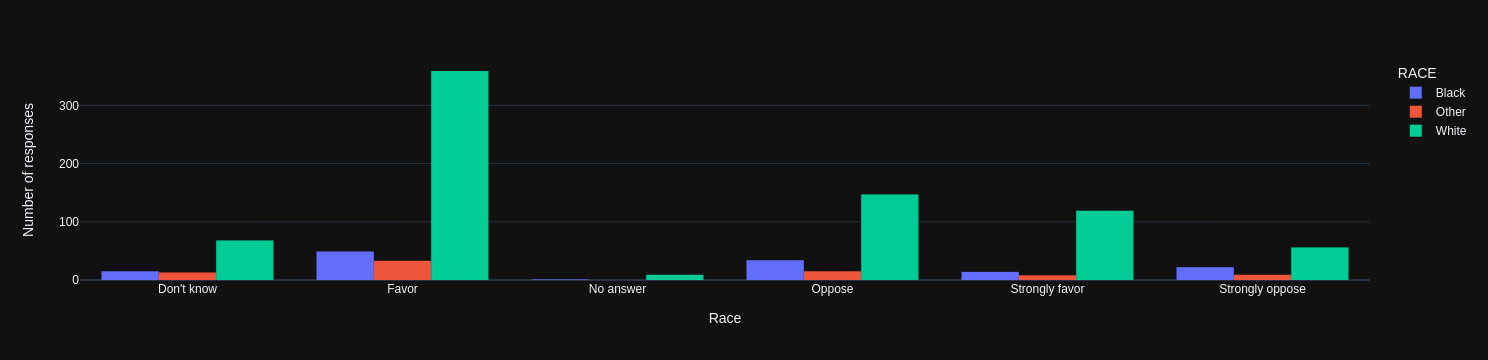

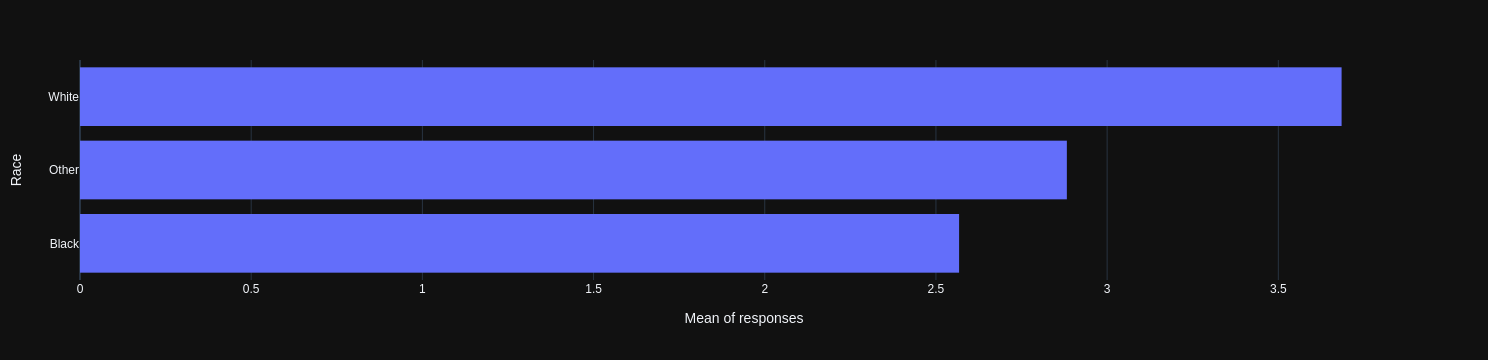

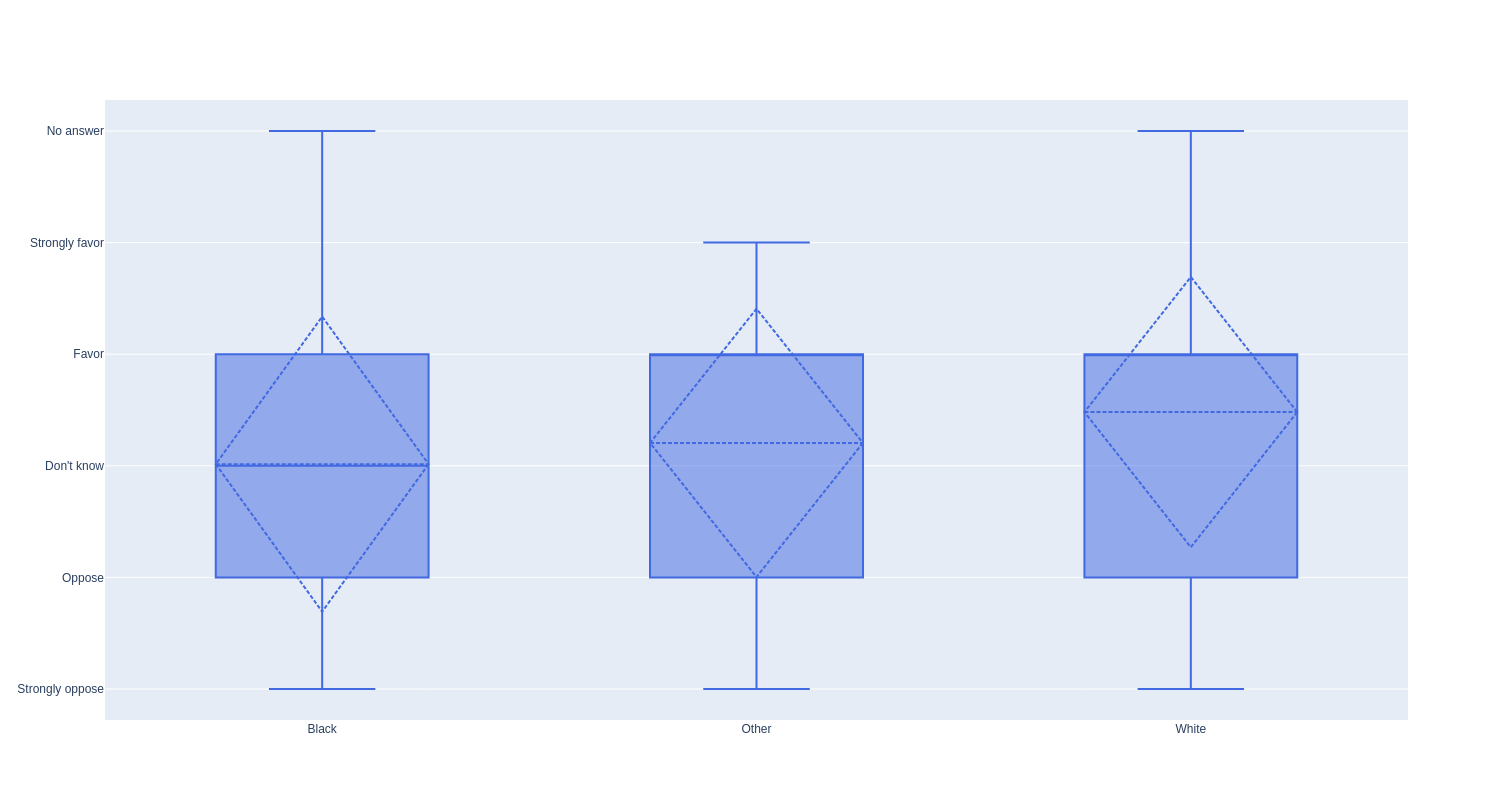

In [23]:
# RACE
fav_list = ["Strongly oppose", "Oppose", "Don't know", "Favor", "Strongly favor"]

# number of responses 
fig = px.histogram(df_clean_nuke, x="RACE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="RACE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Race", yaxis_title="Number of responses",
)
fig.show()

mean_df = mean_df_gen("RACE")

fig = px.histogram(mean_df, x="NUKEELEC", y="RACE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Mean of responses", yaxis_title="Race",
)
fig.show()
#df_clean_nuke["NUKEELEC"].value_counts()
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["RACE"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.update_layout( width=1500, height=800,)
fig.show()

### Race

a majority of these responses are from white respondants. It is not that useful to look at any group other than white respondants

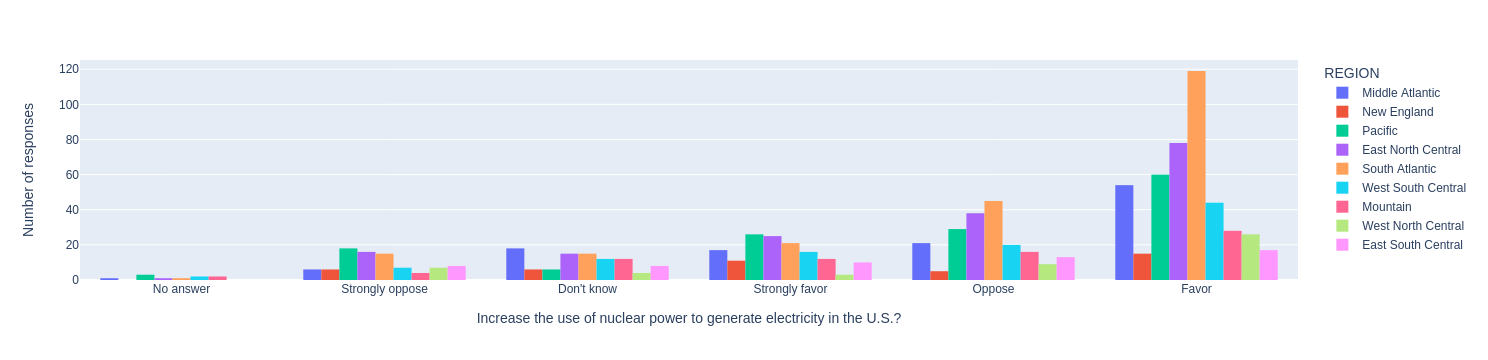

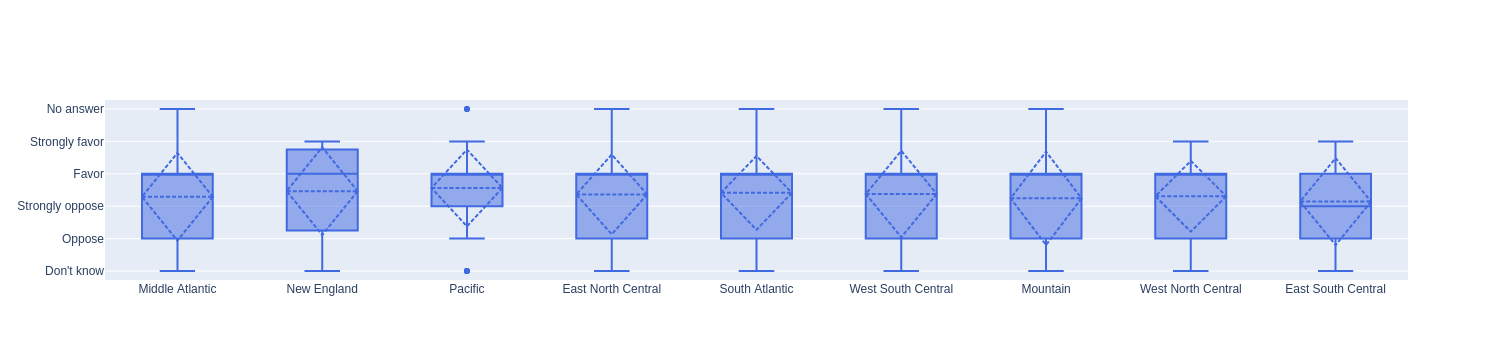

South Atlantic        216
East North Central    173
Pacific               142
Middle Atlantic       117
West South Central    101
Mountain               74
East South Central     56
West North Central     49
New England            43
Name: REGION, dtype: int64

In [24]:
# REGION

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="REGION", barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["REGION"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))#.update_yaxes(categoryorder='array', categoryarray=fav_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

df_clean_nuke["REGION"].value_counts()

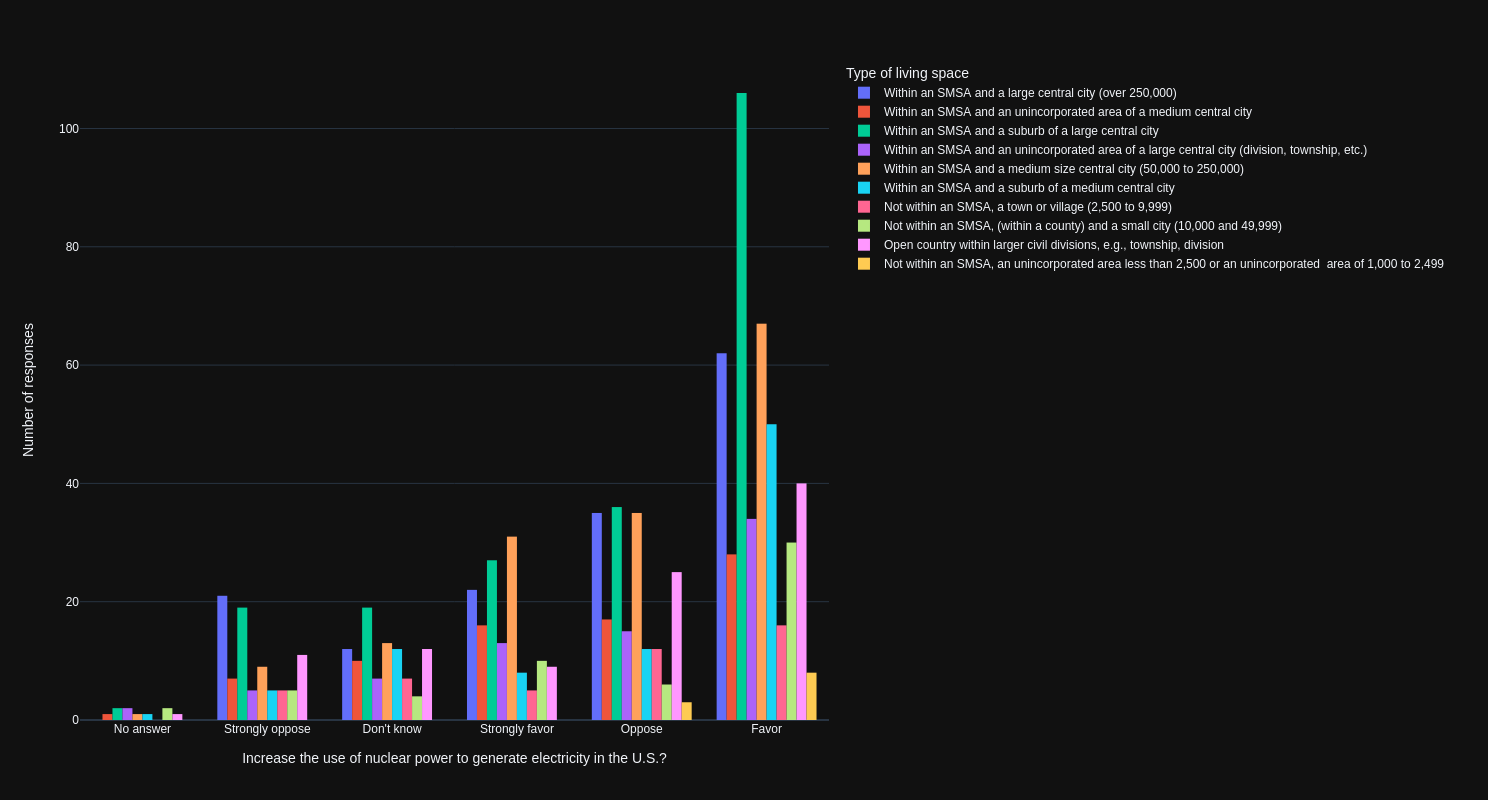

In [25]:
# XNORCSIZ
# SMSA (standard metropolitan statistical area)
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="XNORCSIZ", template='plotly_dark', barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses", legend_title = "Type of living space", width=1500, height=800
)
fig.show()

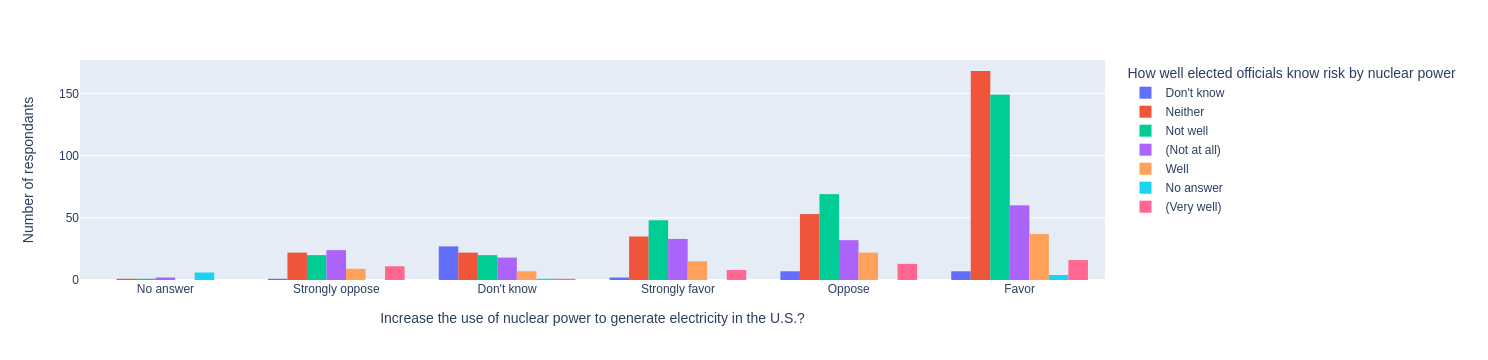

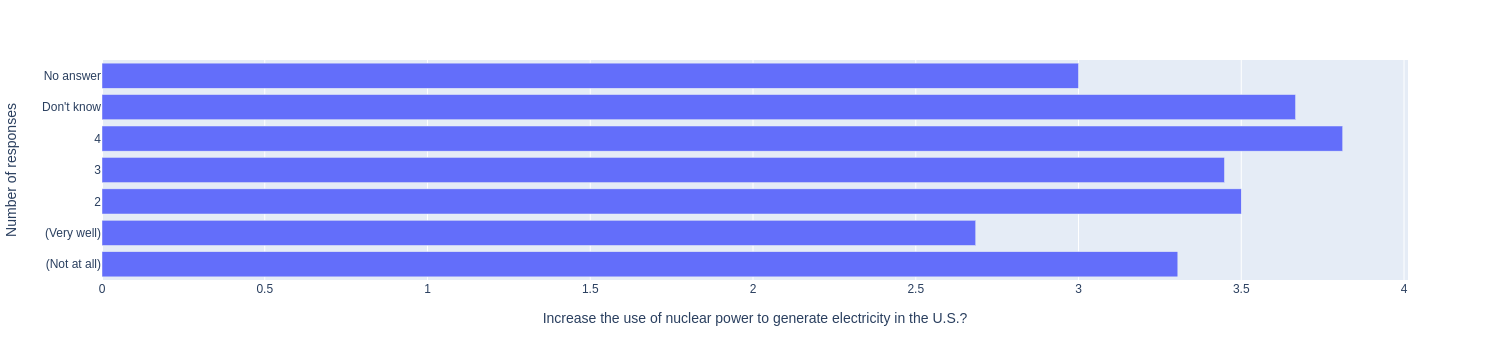

In [26]:
# POLNUKE
# Elected officials (How well elected officials know risk by nuclear power?)

'''
0) Inapplicable	1578	61.9
1) (Very well)	49	1.9
2)	90	3.5
3)	301	11.8
4)	307	12.0
5) (Not at all)	169	6.6
8) Don't know	44	1.7
9) No answer	11	0.4
'''

mean_df = mean_df_gen('POLNUKE')



for ind in df_clean_nuke.index:
    if df_clean_nuke['POLNUKE'][ind] ==  "2":
        df_clean_nuke['POLNUKE'][ind] = "Well"
    if df_clean_nuke['POLNUKE'][ind] ==  "3":
        df_clean_nuke['POLNUKE'][ind] = "Neither"
    if df_clean_nuke['POLNUKE'][ind] ==  "4":
        df_clean_nuke['POLNUKE'][ind] = "Not well"
    
fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="POLNUKE", barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
    yaxis_title="Number of respondants",
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", legend_title="How well elected officials know risk by nuclear power"
)
fig.show()

df_clean_nuke['POLNUKE'].value_counts()

fig = px.bar(mean_df, x="NUKEELEC", y="POLNUKE").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Increase the use of nuclear power to generate electricity in the U.S.?", yaxis_title="Number of responses"
)
fig.show()


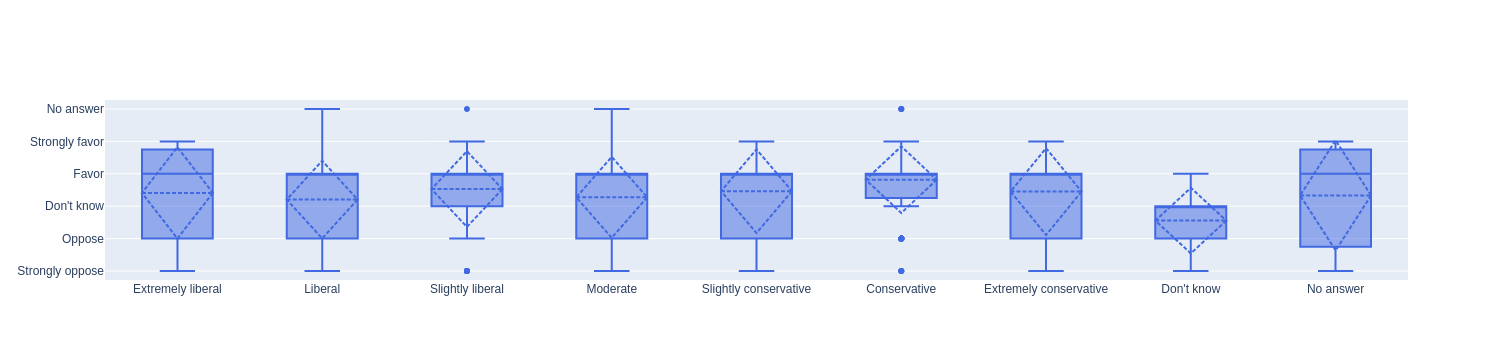

In [27]:

pol_list = ["Extremely liberal", "Liberal", "Slightly liberal", "Moderate", "Slightly conservative", "Conservative", "Extremely conservative"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["POLVIEWS"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=pol_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

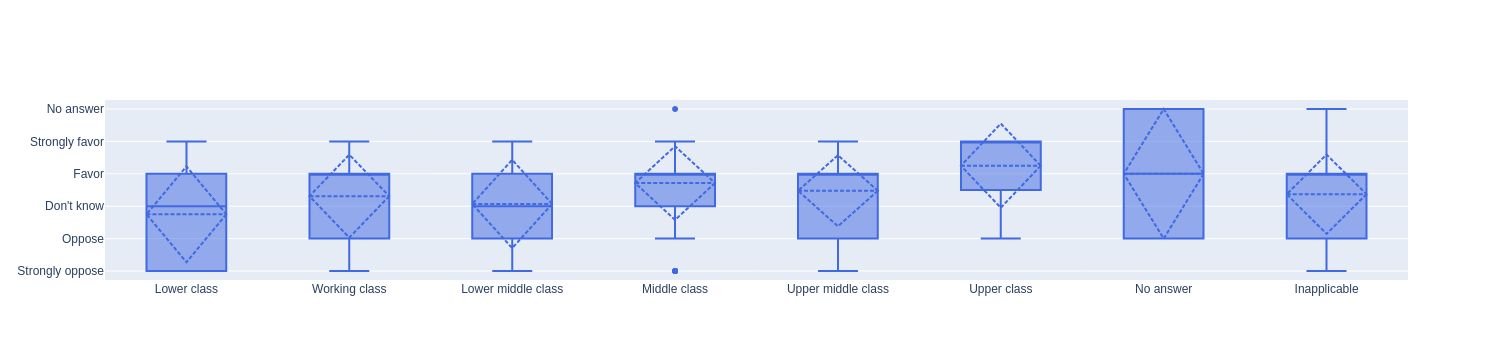

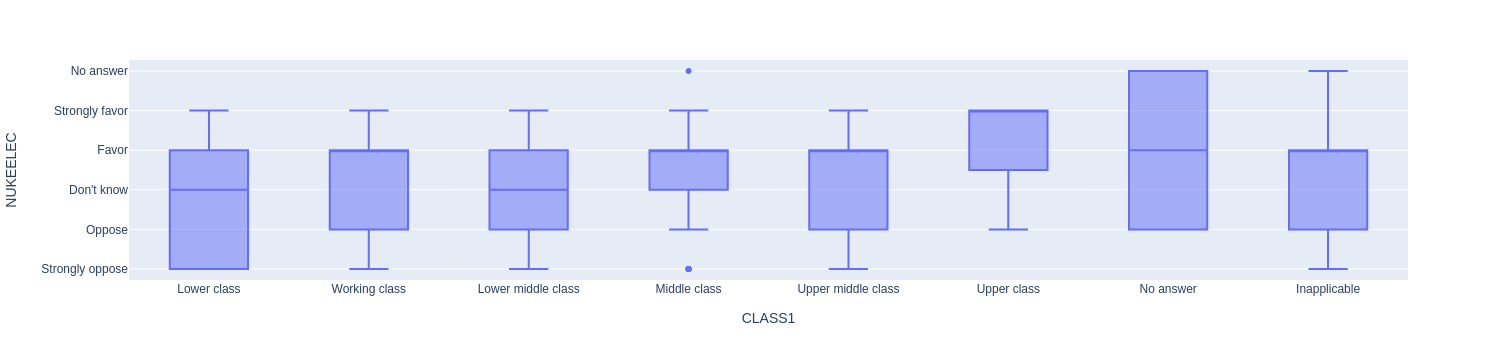

In [48]:
# which class is the respondant in
fav_list = ["Strongly oppose", "Oppose", "Don't know", "Favor", "Strongly favor"]
clas_list = ["Lower class", "Working class", "Lower middle class", "Middle class", "Upper middle class", "Upper class", "No answer"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["CLASS1"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=clas_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

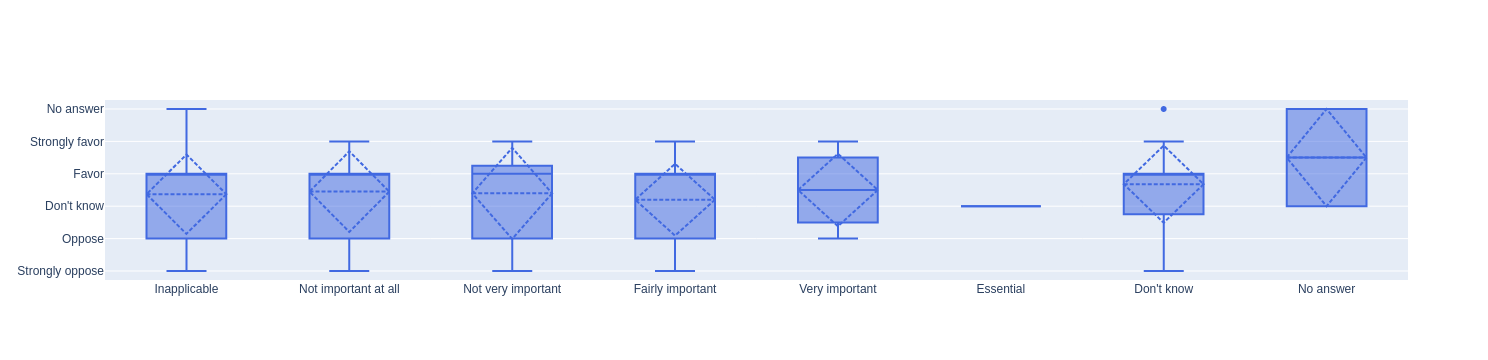

In [31]:
# 1135) OPBRIBES
# For each of these, please tell me how important you think it is for getting ahead in life. How important is giving bribes?

fav_list = ["Strongly oppose", "Oppose", "Don't know", "Favor", "Strongly favor"]
bribe_list = ["Inapplicable", "Not important at all", "Not very important", "Fairly important", "Very important", "Essential"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["OPBRIBES"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=bribe_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

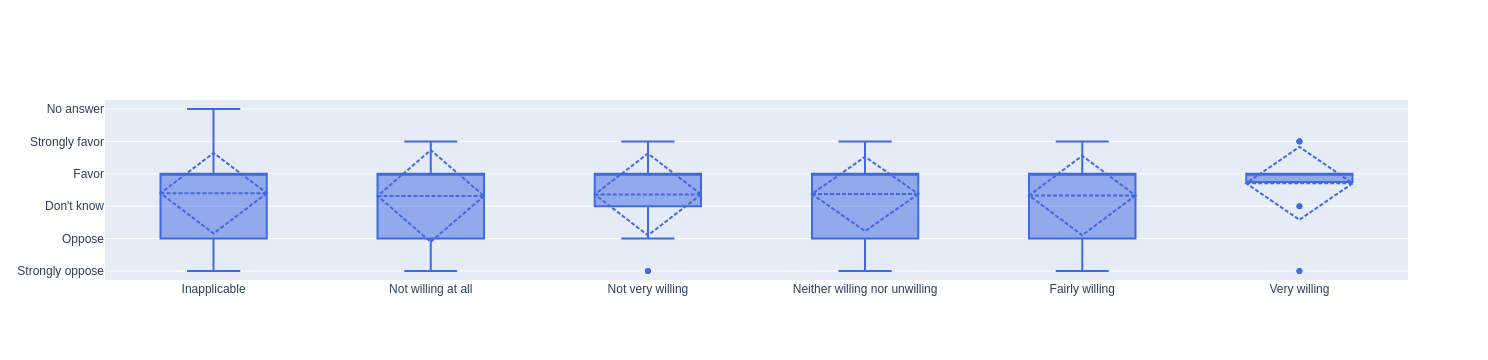

In [32]:
# 1129) PAYENVIR
# How willing would you be to pay much higher prices in order to protect the environment? Would you say . . .

fav_list = ["Strongly oppose", "Oppose", "Don't know", "Favor", "Strongly favor"]
willing_list = ["Inapplicable", "Not willing at all", "Not very willing", "Neither willing nor unwilling", "Fairly willing", "Very willing"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["PAYENVIR"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=willing_list)
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

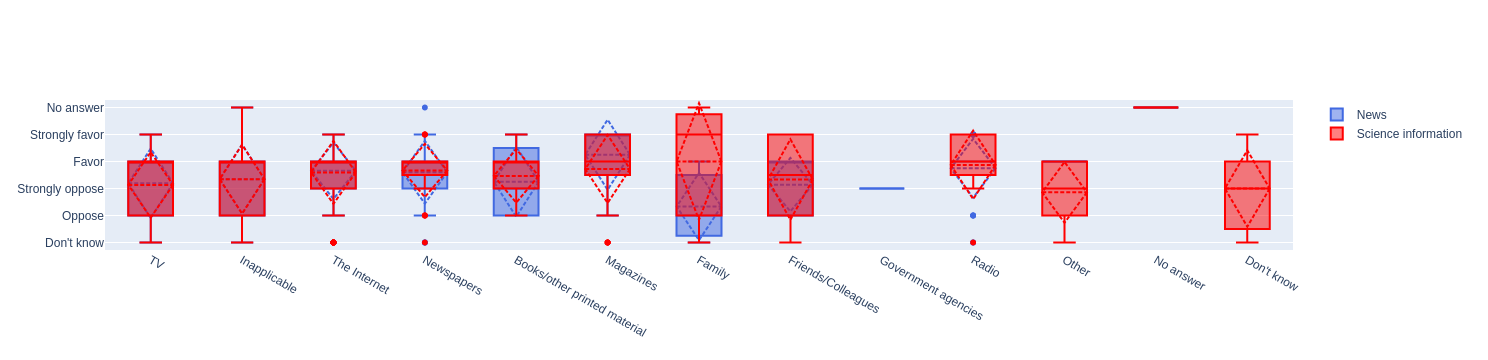

In [63]:
# 1129) PAYENVIR
# How willing would you be to pay much higher prices in order to protect the environment? Would you say . . .

fav_list = ["Strongly oppose", "Oppose", "Don't know", "Favor", "Strongly favor"]
# willing_list = ["Inapplicable", "Not willing at all", "Not very willing", "Neither willing nor unwilling", "Fairly willing", "Very willing"]
fig = go.Figure()
fig.add_trace(go.Box(
    name="News",
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["NEWSFROM"],
    #name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))

fig.add_trace(go.Box(
    name="Science information",
    y=df_clean_nuke["NUKEELEC"],
    x=df_clean_nuke["SCIFROM"],
    #name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
))

#fig.update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=["Yes", "No"])
#fig.update_layout(height=500)
fig.show()
